# Multiple Regression Portfolio Piece

12/8/2019

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.datasets import load_boston
import seaborn as sns

In [2]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target # note that this was stored in a separate attribute, not in main "data"
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print(bos.describe()) # info about each column of data


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Understanding the data

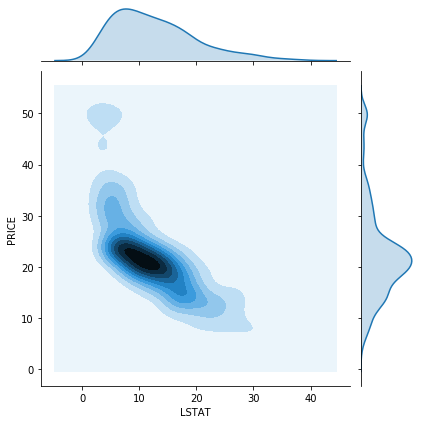

In [8]:
sns.jointplot(x="LSTAT", y="PRICE", data=bos, kind="kde")

### Split the Data

In [9]:
X = bos.drop('PRICE', axis = 1)
X = sm.add_constant(X)
Y = bos['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5) # random_state = NULL for np.random
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 14)
(167, 14)
(339,)
(167,)


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Linear Regression

We will run both a simple regression of `PRICE` on the `LSTAT` predictor, as well as a multiple regression with all predictors in the dataset.

In [10]:
X_train_slr = X_train[['const','LSTAT']]
X_test_slr = X_test[['const','LSTAT']]

In [11]:
slr_model = sm.OLS(Y_train, X_train_slr).fit()
mlr_model = sm.OLS(Y_train, X_train).fit()

In [12]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     408.9
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           4.27e-60
Time:                        14:05:54   Log-Likelihood:                -1088.7
No. Observations:                 339   AIC:                             2181.
Df Residuals:                     337   BIC:                             2189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2770      0.666     51.434      0.000      32.966      35.588
LSTAT         -0.9375      0.046    -20.220      0.000      -1.029      -0.846
==============================================================================
Omnibus:                       95.459   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.403
Skew:                           1.431   Prob(JB):                     9.18e-46
Kurtosis:                       5.548   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     77.10
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           6.06e-91
Time:                        14:05:54   Log-Likelihood:                -984.91
No. Observations:                 339   AIC:                             1998.
Df Residuals:                     325   BIC:                             2051.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8589      5.830      5.636      0.000      21.390      44.328
CRIM          -0.1564      0.039     -4.022      0.000      -0.233      -0.080
ZN             0.0385      0.016      2.371      0.018       0.007       0.071
INDUS         -0.0251      0.071     -0.352      0.725      -0.165       0.115
CHAS           0.7864      1.047      0.751      0.453      -1.273       2.846
NOX          -12.9469      4.594     -2.818      0.005     -21.984      -3.909
RM             4.0027      0.478      8.380      0.000       3.063       4.942
AGE           -0.0116      0.015     -0.780      0.436      -0.041       0.018
DIS           -1.3683      0.238     -5.750      0.000      -1.836      -0.900
RAD            0.3418      0.084      4.072      0.000       0.177       0.507
TAX           -0.0135      0.005     -2.877      0.004      -0.023      -0.004
PTRATIO       -0.9889      0.152     -6.497      0.000      -1.288      -0.689
B              0.0121      0.003      3.762      0.000       0.006       0.018
LSTAT         -0.4726      0.060     -7.922      0.000      -0.590      -0.355
==============================================================================
Omnibus:                      112.211   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.704
Skew:                           1.369   Prob(JB):                    1.67e-102
Kurtosis:                       8.068   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
slr_model.params
slr_model.pvalues
intercept = slr_model.params[0]
LSTAT_coef = slr_model.params[1]
slr_model.rsquared
slr_model.resid
slr_model.fittedvalues
slr_model.mse_resid #There are three different types... messed me up for a while!
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     408.9
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           4.27e-60
Time:                        14:05:54   Log-Likelihood:                -1088.7
No. Observations:                 339   AIC:                             2181.
Df Residuals:                     337   BIC:                             2189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2770      0.666     51.434      0.000      32.966      35.588
LSTAT         -0.9375      0.046    -20.220      0.000      -1.029      -0.846
==============================================================================
Omnibus:                       95.459   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.403
Skew:                           1.431   Prob(JB):                     9.18e-46
Kurtosis:                       5.548   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Correlation Among Predictors

------------|Correlation| > 0.7------------
    param1 param2      corr
136    TAX    RAD  0.928314
149    RAD    TAX  0.928314
47     NOX  INDUS  0.760152
73   INDUS    NOX  0.760152
52     TAX  INDUS  0.727890
143  INDUS    TAX  0.727890
77     AGE    NOX  0.724084
103    NOX    AGE  0.724084
106    DIS    AGE -0.733293
119    AGE    DIS -0.733293
78     DIS    NOX -0.769641
117    NOX    DIS -0.769641


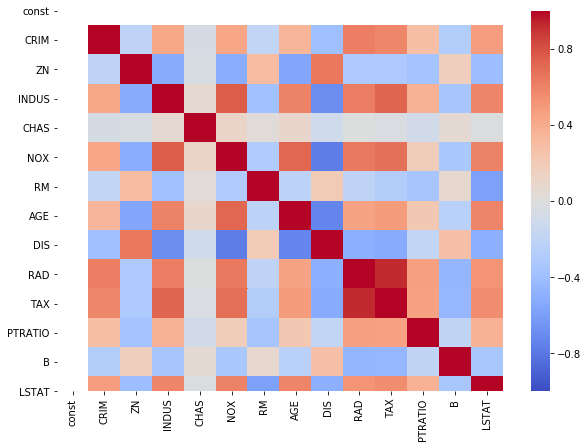

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,7)) # nrows, ncols 
corr = X_train.corr()

sns.heatmap(corr, vmin=-1, vmax=1, ax=ax, cmap='coolwarm')
ax.set_xticklabels(X_train.columns)
ax.set_yticklabels(X_train.columns)
plt.xticks(rotation=90);

corr['param1'] = corr.index
df_unpivoted = corr.melt(id_vars=['param1'], var_name='param2', value_name='corr')
print('------------|Correlation| > 0.7------------')
print(df_unpivoted.loc[(df_unpivoted['corr'].abs() >= 0.7) & (df_unpivoted['param1'] != df_unpivoted['param2'])].sort_values(by='corr', ascending=False))

#### Mean Squared Error of Residuals Training Data

$MSE = \frac{1}{n} \sum_{i=1}^{n} \left(y_i - \hat{f}(x_i) \right)$

$R^2 = \frac{Variance \, Explained \, by \, Model}{Total \, Variance} = $

In [16]:
train_rmse_resid_slr = np.sqrt(slr_model.mse_resid)
train_rmse_resid_mlr = np.sqrt(mlr_model.mse_resid)

print(f'Training RMSE SLR = {train_rmse_resid_slr:.2f}')
print(f'Training RMSE MLR = {train_rmse_resid_mlr:.2f}\n')
print(f'R^2 SLR = {slr_model.rsquared:.2f}')
print(f'R^2 MLR = {mlr_model.rsquared:.2f}\n')
print(f'Adjusted R^2 SLR = {slr_model.rsquared_adj:.2f}')
print(f'Adjusted R^2 MLR = {mlr_model.rsquared_adj:.2f}')

Training RMSE SLR = 6.02
Training RMSE MLR = 4.52

R^2 SLR = 0.55
R^2 MLR = 0.76

Adjusted R^2 SLR = 0.55
Adjusted R^2 MLR = 0.75


#### Residual Plot

Residuals should exhibit following behaviors:
* Have a constant variance
* Be approximately normally distributed (with a mean of zero)
* Be independent of one another over time. (Uncorrelated)

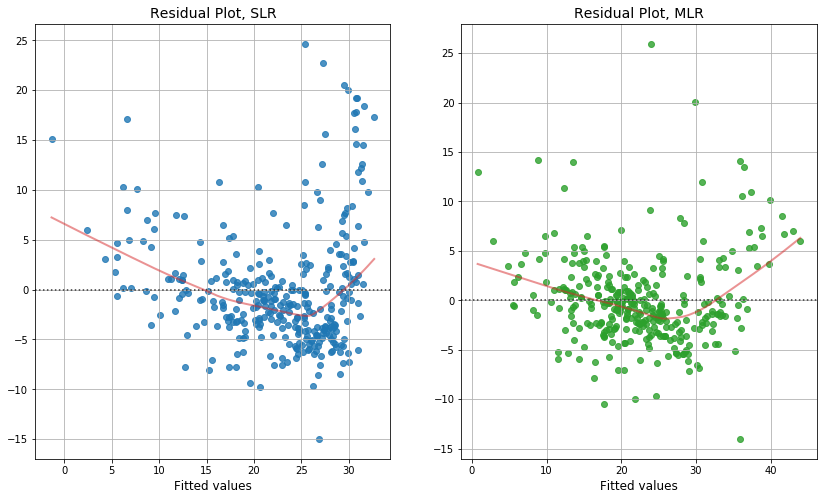

In [17]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,8)) # nrows, ncols 
sns.residplot(x=slr_model.fittedvalues,y=slr_model.resid,lowess=True, color='tab:blue',
              line_kws={'color': 'tab:red', 'lw': 2, 'alpha': 0.5}, ax=ax1).set_title("Residual Plot, SLR", fontsize=14);
ax1.yaxis.label.set_visible(False)
ax1.set_xlabel("Fitted values",fontsize=12)
ax1.grid(True)

sns.residplot(x=mlr_model.fittedvalues,y=mlr_model.resid,lowess=True, color='tab:green',
              line_kws={'color': 'tab:red', 'lw': 2, 'alpha': 0.5}, ax=ax2).set_title("Residual Plot, MLR", fontsize=14);
ax2.yaxis.label.set_visible(False)
ax2.set_xlabel("Fitted values",fontsize=12)
ax2.grid(True)
plt.show()

#### Studentized Residuals

A studentized residual is calculated by dividing the residual by an estimate of its standard deviation. The standard deviation for each residual is computed with the observation excluded. For this reason, studentized residuals are sometimes referred to as externally studentized residuals. (Internal if the $Var(\epsilon$) includes $i^{th}$ residual.)

Studentized residuals are more effective in detecting outliers and in assessing the equal variance assumption. The Studentized Residual by Row Number plot essentially conducts a t test for each residual. Values greater than 3 are a concern.

Cook’s D measures how much the model coefficient estimates would change if an observation were to be removed from the data set. ($Cooks > 4 / n$ is a concern.)

In [18]:
resid_studentized_slr = slr_model.get_influence().resid_studentized_internal
resid_studentized_mlr = mlr_model.get_influence().resid_studentized_internal

cooks_d_slr, pvals_slr = slr_model.get_influence().cooks_distance
cooks_color_slr = np.where(cooks_d_slr > 4 / np.shape(resid_studentized_slr)[0] ,'tab:red','tab:blue')

cooks_d_mlr, pvals_mlr = mlr_model.get_influence().cooks_distance
cooks_color_mlr = np.where(cooks_d_mlr > 4 / np.shape(resid_studentized_mlr)[0] ,'tab:red','tab:blue')

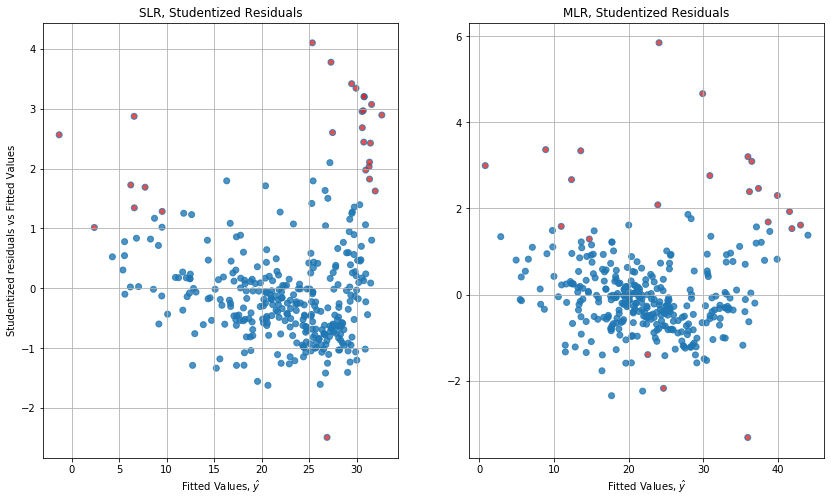

In [19]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,8))
sns.regplot(x=slr_model.fittedvalues, y=resid_studentized_slr, color='tab:blue', ax=ax1, fit_reg=False,
              scatter=True,
              lowess=True,
              scatter_kws={'facecolors':cooks_color_slr},
              line_kws={'color': 'tab:red', 'lw': 1, 'alpha': 0.8}).set_title('SLR, Studentized Residuals')
ax1.set_ylabel("Studentized residuals vs Fitted Values")
ax1.set_xlabel("Fitted Values, $\hat{y}$")
ax1.grid(True);

sns.regplot(x=mlr_model.fittedvalues, y=resid_studentized_mlr, color='tab:blue', ax=ax2, fit_reg=False,
              scatter=True,
              lowess=True,
              scatter_kws={'facecolors':cooks_color_mlr},
              line_kws={'color': 'tab:red', 'lw': 1, 'alpha': 0.8}).set_title('MLR, Studentized Residuals')
ax2.yaxis.label.set_visible(False)
ax2.set_xlabel("Fitted Values, $\hat{y}$")
ax2.grid(True);

#### QQ Plots

A Q–Q plot is a plot of the quantiles of two distributions against each other, or a plot based on estimates of the quantiles. The pattern of points in the plot is used to compare the two distributions. The main step in constructing a Q–Q plot is calculating or estimating the quantiles to be plotted. 

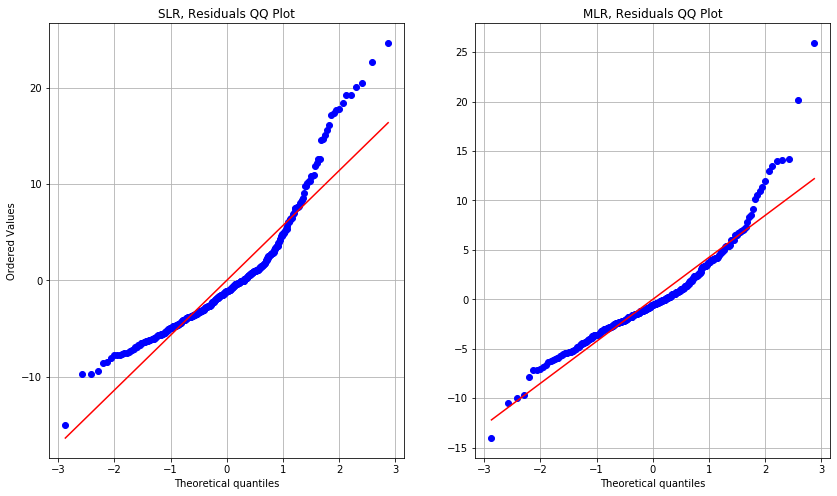

In [20]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(14,8))
stats.probplot(slr_model.resid, dist="norm", plot=ax1);
ax1.set_title('SLR, Residuals QQ Plot')
ax1.grid(True)

stats.probplot(mlr_model.resid, dist="norm", plot=ax2);
ax2.yaxis.label.set_visible(False)
ax2.set_title('MLR, Residuals QQ Plot')
ax2.grid(True)

### Test Models

In [21]:
pred_slr = slr_model.predict(X_test_slr)
pred_mlr = mlr_model.predict(X_test)

get_pred_slr = slr_model.get_prediction(X_test_slr)
get_pred_mlr = mlr_model.get_prediction(X_test)

In [32]:
get_pred_slr.summary_frame(alpha=0.05);
get_pred_mlr.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
226,37.467236,0.826301,35.841663,39.092808,28.436636,46.497835
292,31.391547,1.148377,29.132357,33.650737,22.225676,40.557418
90,27.120196,0.601009,25.937838,28.302554,18.158767,36.081626
373,6.468433,1.059757,4.383585,8.553282,-2.656030,15.592897
273,33.629667,1.189849,31.288889,35.970446,24.443347,42.815988
...,...,...,...,...,...,...
48,9.718369,1.269992,7.219927,12.216811,0.490614,18.946123
281,34.705200,0.672685,33.381834,36.028566,25.724079,43.686322
42,25.704102,0.818064,24.094732,27.313472,16.676405,34.731799
115,20.154309,0.664904,18.846249,21.462369,11.175430,29.133188


In [23]:
pred = X_test.copy(deep=True)
pred['Y_test'] = Y_test
pred['pred_slr'] = pred_slr.values
pred['pred_mlr'] = pred_mlr.values

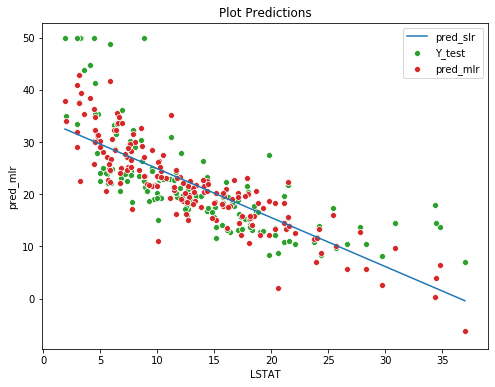

In [24]:
fig, ax1 = plt.subplots(1,1,figsize=(8,6))
sns.scatterplot(x="LSTAT", y="Y_test", data=pred, ax=ax1, color='tab:green', label="Y_test")
sns.lineplot(x="LSTAT", y="pred_slr", data=pred, ax=ax1, color='tab:blue', label="pred_slr" )
sns.scatterplot(x="LSTAT", y="pred_mlr", data=pred, ax=ax1, color='tab:red', label="pred_mlr");
ax1.set_title('Plot Predictions');

In [25]:
test_rmse_slr = sm.tools.eval_measures.rmse(pred['Y_test'].values, pred['pred_slr'].values)
test_rmse_mlr = sm.tools.eval_measures.rmse(pred['Y_test'].values, pred['pred_mlr'].values)


print(f'Training RMSE SLR = {train_rmse_resid_slr:.2f}')
print(f'Training RMSE MLR = {train_rmse_resid_mlr:.2f}\n')
print(f'Test RMSE SLR = {test_rmse_slr:.2f}')
print(f'Test RMSE MLR = {test_rmse_mlr:.2f}')

Training RMSE SLR = 6.02
Training RMSE MLR = 4.52

Test RMSE SLR = 6.59
Test RMSE MLR = 5.34


Multicollinearity makes it hard to assess the relative importance of independent variables, but it does not affect the usefulness of the regression equation for prediction. Even when multicollinearity is great, the least-squares regression equation can be highly predictive. So, if you are only interested in prediction, multicollinearity is not a problem.